In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import os
import copy
from scipy.stats import expon
#from ReadKTOutputFile import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
with open('../20200626_sierra/frequency.json') as infile:
    freq = np.array(json.load(infile))
    
with open('../20200626_sierra/freq_error.json') as infile:
    freq_error = np.array(json.load(infile))
    
with open('../20200626_sierra/slope.json') as infile:
    slope = json.load(infile)
    
with open('../20200626_sierra/slope_error.json') as infile:
    slope_error = json.load(infile)
    
with open('../20200626_sierra/track_length.json') as infile:
    track_length = json.load(infile)
    
with open('../20200626_sierra/track_length_error.json') as infile:
    track_length_error = json.load(infile)
    
with open('../20200626_sierra/snr.json') as infile:
    snr = json.load(infile)
    
with open('../20200626_sierra/snr_error.json') as infile:
    snr_error = json.load(infile)

In [3]:
track_length_error = np.asarray(track_length_error)
track_length = np.asarray(track_length)
freq = np.asarray(freq)
freq_error = np.asarray(freq_error)
slope = np.asarray(slope)
slope_error = np.asarray(slope_error)
snr = np.asarray(snr)
snr_error = np.asarray(snr_error)

In [4]:
#hardcoding to select events that reside in the central frequency error bin
bin_mask = np.where((freq_error >= -0.01590315*10e3) & (freq_error <= 0.02725145*10e3))
zoomed_freq_error = freq_error[bin_mask]
zoomed_slope = slope[bin_mask]
zoomed_track_length = track_length[bin_mask]
zoomed_freq = freq[bin_mask]
zoomed_snr = snr[bin_mask]

In [5]:
print(len(freq))
print(len(zoomed_freq))

10768
10716


In [6]:
#creating a new colormap to make the bins with 0 counts dark
my_cmap = copy.copy(cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad((0.2,  0,  0.2))

(-149, 265.44545391919416)

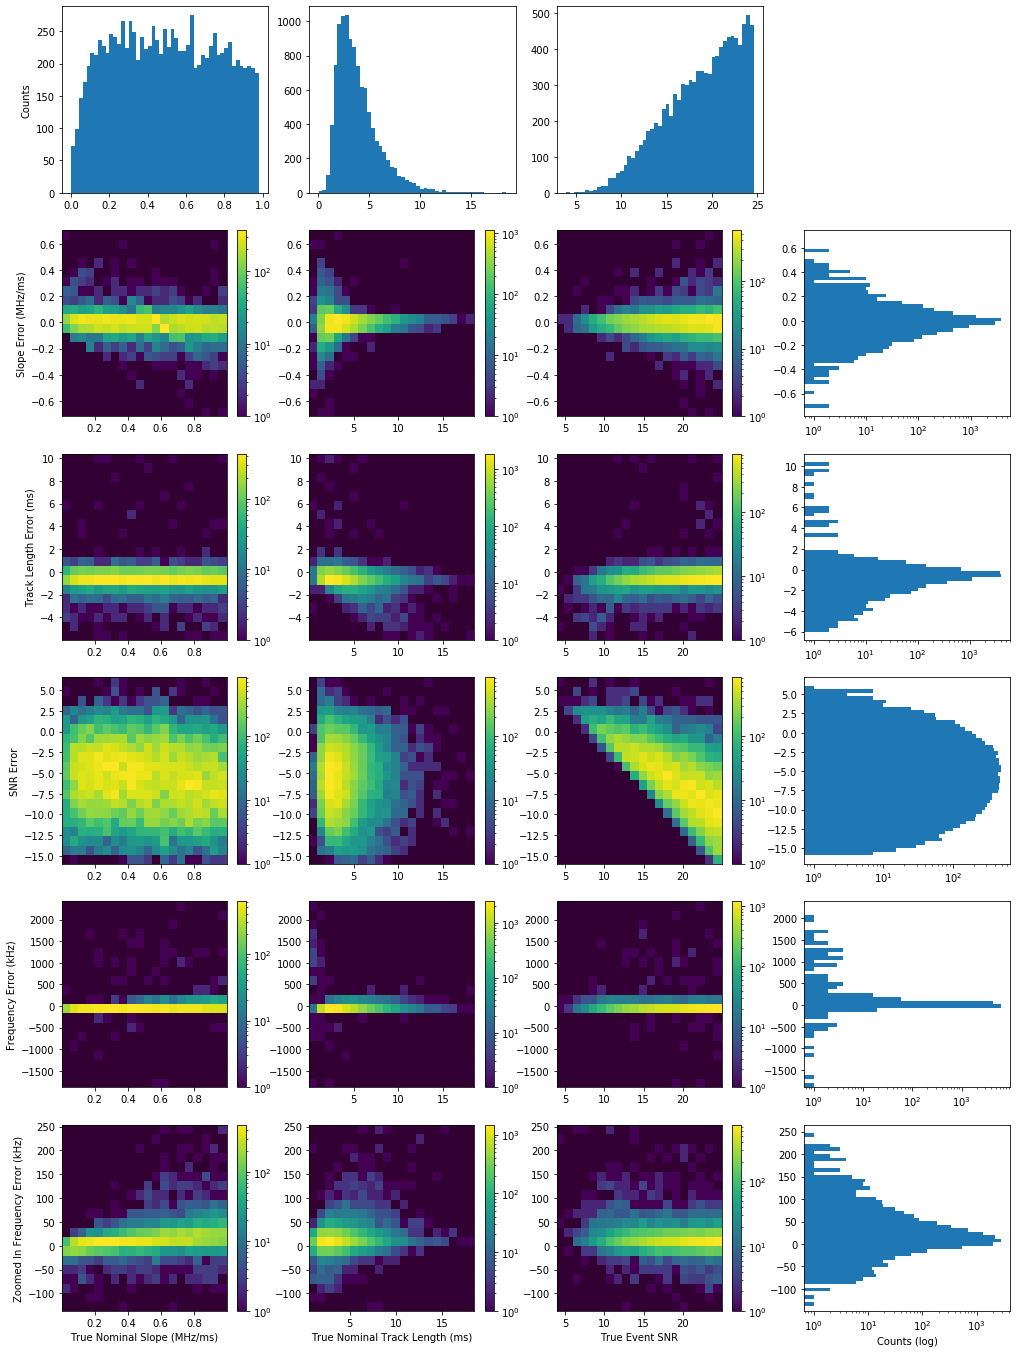

In [7]:
#creating a plot matrix of the paramaters and their errors using 2d hists
fig, axes = plt.subplots(6, 4, figsize=(17, 24))
params = {'True Nominal Slope (MHz/ms)': slope, 'True Nominal Track Length (ms)': track_length*10e3, 'True Event SNR': snr}
params_error = [slope_error, track_length_error, freq_error]
zoomed_params = {'True Nominal Slope (MHz/ms)': zoomed_slope, 'True Nominal Track Length (ms)': zoomed_track_length*10e3, 'True Event SNR': zoomed_snr}

#plotting the distributions of the parameters (first row in plot matrix)
param_hists = []
for ax, param in zip(axes[0], params.values()):
    param_hists.append(ax.hist(param, bins=np.arange(np.min(param), np.max(param), (np.max(param)-np.min(param))/50)))
    
axes[0][0].set_ylabel('Counts')

#plotting the parameter vs slope error 2d hists
slope_error_hists = []
for ax, param in zip(axes[1], params.values()):
    hist = ax.hist2d(param, slope_error, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20])
    slope_error_hists.append(hist)
    plt.colorbar(hist[3], ax = ax)
    
axes[1][0].set_ylabel('Slope Error (MHz/ms)')

#plotting the parameter vs track length error 2d hists
track_length_error_hists = []
for ax, param in zip(axes[2], params.values()):
    hist = ax.hist2d(param, track_length_error*10e3, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20])
    track_length_error_hists.append(hist)
    plt.colorbar(hist[3], ax = ax)

axes[2][0].set_ylabel('Track Length Error (ms)')

#plotting the paramter vs snr error 2d hists
snr_error_hists = []
for ax, param in zip(axes[3], params.values()):
    snr_error_hists.append(ax.hist2d(param, snr_error, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20]))
    plt.colorbar(hist[3], ax=ax)
    
axes[3][0].set_ylabel('SNR Error')
    
#plotting the parameter vs frequency error 2d hists
freq_error_hists = []
for ax, param in zip(axes[4], params.values()):
    hist = ax.hist2d(param, freq_error, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20])
    freq_error_hists.append(hist)
    plt.colorbar(hist[3], ax = ax)
#     print('1:')
#     print(hist[1])
#     print('2:')
#     print(hist[2])

axes[4][0].set_ylabel('Frequency Error (kHz)')

#zooming in on the frequency error
zoomed_freq_error_hists = []
for ax, param, name in zip(axes[5], zoomed_params.values(), zoomed_params.keys()):
    hist = ax.hist2d(param, zoomed_freq_error, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20])
    zoomed_freq_error_hists.append(hist)
    plt.colorbar(hist[3], ax = ax)
    ax.set_xlabel(name)

axes[5][0].set_ylabel('Zoomed In Frequency Error (kHz)')

#deleting the upper right subplot, because it is not necessary    
fig.delaxes(axes[0][3])
    
#plotting the parameter error distributions
axes[1][3].hist(slope_error, bins=np.arange(np.min(slope_error), np.max(slope_error), (np.max(slope_error)-np.min(slope_error))/50), orientation='horizontal');
axes[1][3].set_xscale('log')
#axes[1][3].set_xlabel('Counts (log)')

axes[2][3].hist(track_length_error*10e3, bins=np.arange(np.min(track_length_error*10e3), np.max(track_length_error*10e3), (np.max(track_length_error*10e3)-np.min(track_length_error*10e3))/50), orientation='horizontal');
axes[2][3].set_xscale('log')
axes[2][3].locator_params(axis='y', nbins=8, min_n_ticks=8)
#axes[2][3].set_xlabel('Counts (log)')

axes[3][3].hist(snr_error, bins=np.arange(np.min(snr_error), np.max(snr_error), (np.max(snr_error)-np.min(snr_error))/50), orientation='horizontal')
axes[3][3].set_xscale('log')
axes[3][3].locator_params(axis='y', nbins=8, min_n_ticks=8)

axes[4][3].hist(freq_error, bins=np.arange(np.min(freq_error), np.max(freq_error), (np.max(freq_error)-np.min(freq_error))/50), orientation='horizontal');
axes[4][3].set_xscale('log')
#axes[4][3].set_xlabel('Counts (log)')
axes[4][3].set_ylim(-1900, 2400)
axes[4][3].locator_params(axis='y', nbins=8, min_n_ticks=8)

axes[5][3].hist(zoomed_freq_error, bins=np.arange(np.min(zoomed_freq_error), np.max(zoomed_freq_error), (np.max(zoomed_freq_error)-np.min(zoomed_freq_error))/50), orientation='horizontal')
axes[5][3].set_xscale('log')
axes[5][3].set_xlabel('Counts (log)')
axes[5][3].set_ylim(bottom=-149)
#axes[5][3].locator_params(axis='y', nbins=8)

#plt.savefig('../20200626_sierra/plot_matrix.png')

Text(0.5, 0, 'Counts (log)')

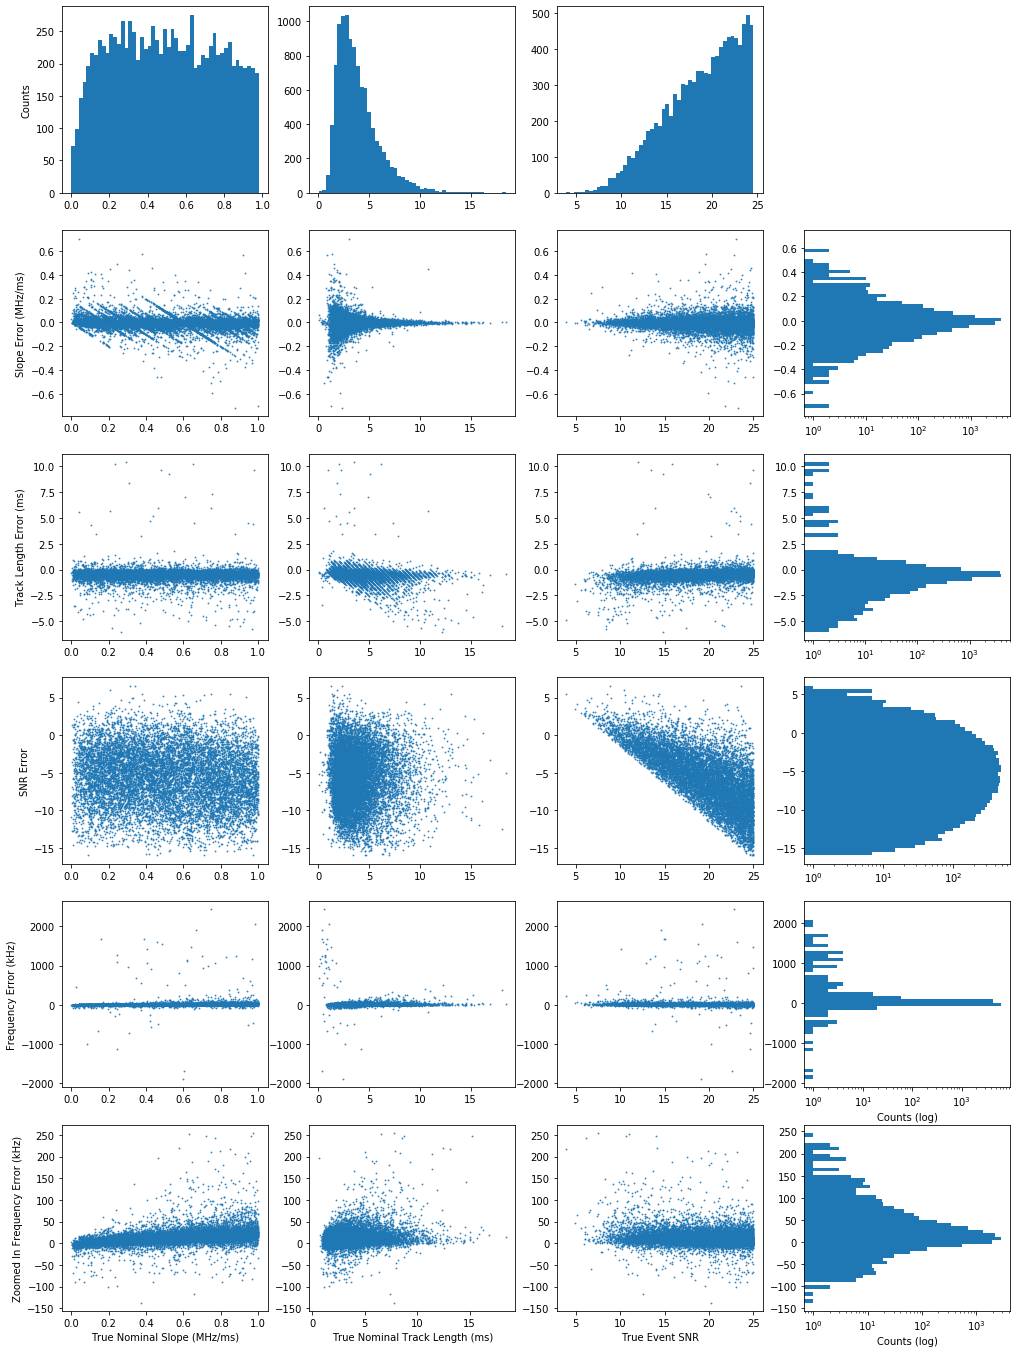

In [8]:
#creating a plot matrix of the paramaters and their errors using scatter plots
fig, axes = plt.subplots(6, 4, figsize=(17, 24))

#plotting the distributions of the parameters (first row in plot matrix)
for ax, param in zip(axes[0], params.values()):
    ax.hist(param, bins=np.arange(np.min(param), np.max(param), (np.max(param)-np.min(param))/50))
    
axes[0][0].set_ylabel('Counts')
    
#plot parameter vs slope error
for ax, param in zip(axes[1], params.values()):
    hist = ax.scatter(param, slope_error, s=0.75, alpha=0.8)
    #ax.set_xlim(np.min(param), np.max(param))
    
axes[1][0].set_ylabel('Slope Error (MHz/ms)')

#plot parameter vs track length error
for ax, param in zip(axes[2], params.values()):
    hist = ax.scatter(param, track_length_error*10e3, s=0.75, alpha=0.8)
    #ax.set_xlim(np.min(param), np.max(param))

axes[2][0].set_ylabel('Track Length Error (ms)')
    
#plot parameter vs snr error
for ax, param in zip(axes[3], params.values()):
    hist = ax.scatter(param, snr_error, s=0.75, alpha=0.8)
    
axes[3][0].set_ylabel('SNR Error')

#plot parameter vs frequency error
for ax, param in zip(axes[4], params.values()):
    hist = ax.scatter(param, freq_error, s=0.75, alpha=0.8)
    #ax.set_xlabel(name)
    #ax.set_xlim(np.min(param), np.max(param))
    
axes[4][0].set_ylabel('Frequency Error (kHz)')

#zoom in on frequency error
for ax, param, name in zip(axes[5], zoomed_params.values(), zoomed_params.keys()):
    hist = ax.scatter(param, zoomed_freq_error, s=0.75, alpha=0.8)
    ax.set_xlabel(name)
    
axes[5][0].set_ylabel('Zoomed In Frequency Error (kHz)')
    
#deleting the upper right subplot because it is unneccessary
fig.delaxes(axes[0][3])
    
#plotting the parameter error distributions
axes[1][3].hist(slope_error, bins=np.arange(np.min(slope_error), np.max(slope_error), (np.max(slope_error)-np.min(slope_error))/50), orientation='horizontal');
axes[1][3].set_xscale('log')
#axes[1][3].set_xlabel('Counts (log)')

axes[2][3].hist(track_length_error*10e3, bins=np.arange(np.min(track_length_error*10e3), np.max(track_length_error*10e3), (np.max(track_length_error*10e3)-np.min(track_length_error*10e3))/50), orientation='horizontal');
axes[2][3].set_xscale('log')
#axes[2][3].set_xlabel('Counts (log)')

axes[3][3].hist(snr_error, bins=np.arange(np.min(snr_error), np.max(snr_error), (np.max(snr_error)-np.min(snr_error))/50), orientation='horizontal')
axes[3][3].set_xscale('log')

axes[4][3].hist(freq_error, bins=np.arange(np.min(freq_error), np.max(freq_error), (np.max(freq_error)-np.min(freq_error))/50), orientation='horizontal');
axes[4][3].set_xscale('log')
axes[4][3].set_xlabel('Counts (log)')

axes[5][3].hist(zoomed_freq_error, bins=np.arange(np.min(zoomed_freq_error), np.max(zoomed_freq_error), (np.max(zoomed_freq_error)-np.min(zoomed_freq_error))/50), orientation='horizontal')
axes[5][3].set_xscale('log')
axes[5][3].set_xlabel('Counts (log)')
#axes[5][3].locator_params(axis='y', nbins=6)

# axes[4][2].locator_params(axis='x', nbins=6)
# axes[4][2].set_xlim(right=1.44)

#plt.savefig('../20200626_sierra/scatter_plot_matrix.png')

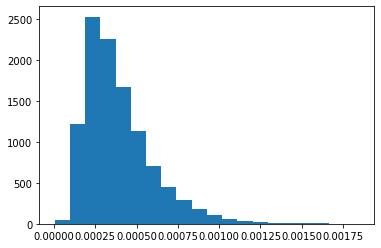

In [9]:
track_length_hist = plt.hist(track_length, bins=20)

In [10]:
track_length_hist[0]

array([4.500e+01, 1.223e+03, 2.534e+03, 2.259e+03, 1.673e+03, 1.140e+03,
       7.050e+02, 4.470e+02, 2.900e+02, 1.860e+02, 1.120e+02, 6.000e+01,
       3.400e+01, 2.600e+01, 1.000e+01, 1.100e+01, 6.000e+00, 4.000e+00,
       1.000e+00, 2.000e+00])

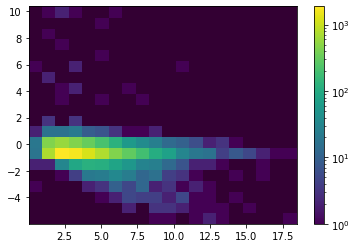

In [11]:
figure = plt.figure()
track_length_2d_hist = plt.hist2d(track_length*10e3, track_length_error*10e3, norm=colors.LogNorm(), cmap=my_cmap, bins=[20, 20])
plt.colorbar()
del figure

In [12]:
type(track_length_2d_hist[0])

numpy.ndarray

In [13]:
divided_hist = []
for col, binn in zip(track_length_2d_hist[0], track_length_hist[0]):
    print(col)
    print(binn)
    divided_hist.append(col/binn)
# np.array(divided_hist)

[ 0.  0.  0.  1.  0.  2. 19. 20.  2.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.]
45.0
[  0.   0.   0.   0.   0.   2. 740. 457.  17.   3.   0.   0.   0.   2.
   0.   0.   0.   1.   0.   1.]
1223.0
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 3.200e+01 1.893e+03
 5.860e+02 1.700e+01 0.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00]
2534.0
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00 9.000e+01 1.683e+03
 4.520e+02 2.200e+01 3.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00
 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
2259.0
[   0.    0.    0.    2.   21.  120. 1190.  331.    9.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
1673.0
[  0.   0.   1.   3.  23. 114. 779. 210.   7.   0.   0.   1.   0.   0.
   0.   1.   0.   0.   1.   0.]
1140.0
[  0.   0.   2.  10.  34.  81. 451. 123.   3.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   1.]
705.0
[  0.   2.   5.   5.  24.  55. 

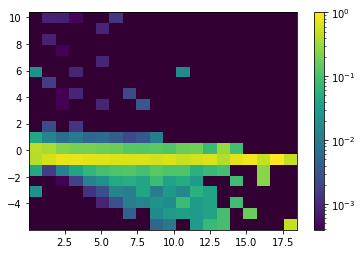

In [14]:
extent = [np.min(track_length_2d_hist[1]), np.max(track_length_2d_hist[1]), np.min(track_length_2d_hist[2]), np.max(track_length_2d_hist[2])]
plt.imshow(np.transpose(np.array(divided_hist)), norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
plt.colorbar()

In [15]:
#dividing out the distributions from the 2d histograms
divided_2dhists = []
extents = []

#iterating through the parameter error histograms
for error_hists in [slope_error_hists, track_length_error_hists, snr_error_hists, freq_error_hists, zoomed_freq_error_hists]:
    param = []
    extent = []
    #iterating through each parameter in the error histograms and the parameter histograms
    for error_hist, hist in zip(error_hists, param_hists):
        divided_hist = []
        #setting the x and y values of each histogram
        extent.append([np.min(error_hist[1]), np.max(error_hist[1]), np.min(error_hist[2]), np.max(error_hist[2])])
        for col, binn in zip(error_hist[0], hist[0]):
            divided_hist.append(col/binn)
            
        param.append(np.transpose(np.array(divided_hist)))

    divided_2dhists.append(param)
    extents.append(extent)

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


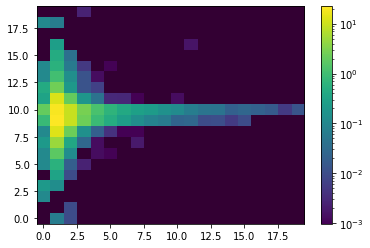

In [16]:
plt.imshow(divided_2dhists[0][1], norm=colors.LogNorm(), cmap=my_cmap, origin='lower', aspect='auto' )
plt.colorbar()

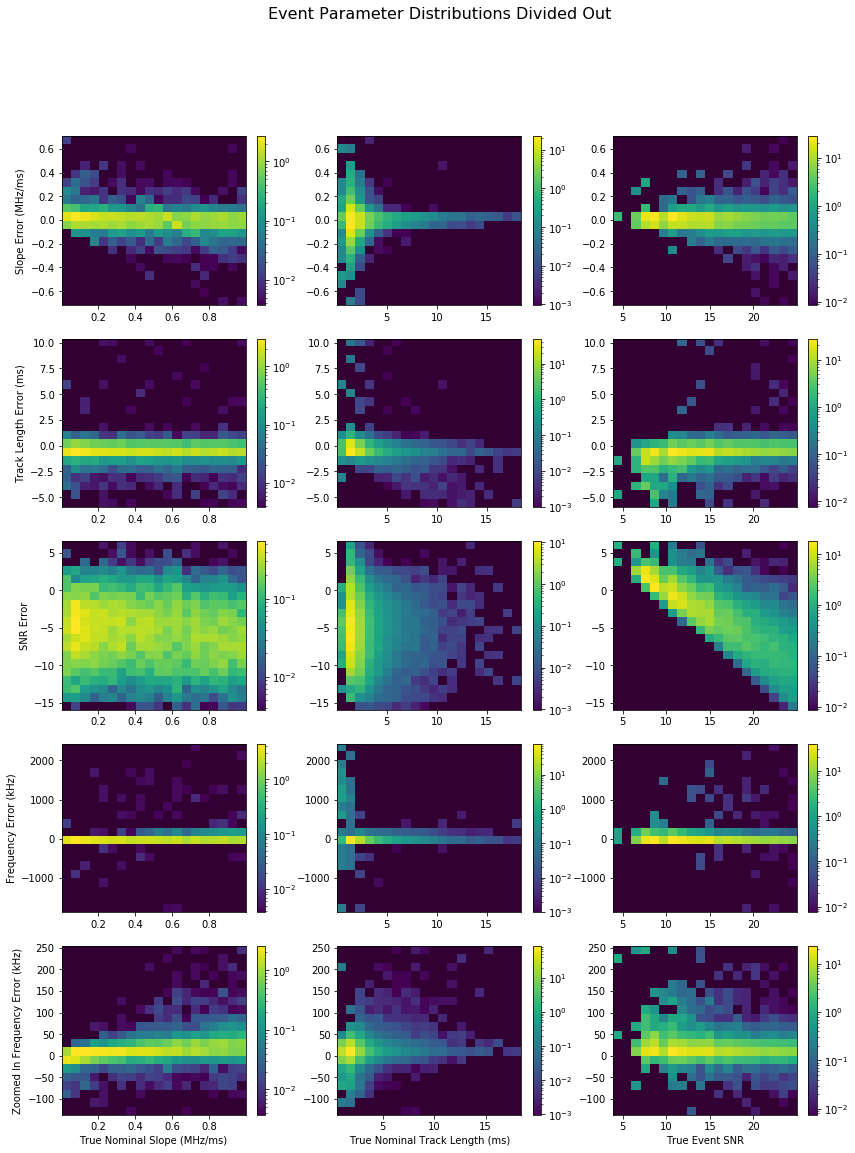

In [18]:
fig, axes = plt.subplots(5, 3, figsize=(14, 18))
fig.suptitle('Event Parameter Distributions Divided Out', fontsize=16)
for ax, param, extent in zip(axes[0], divided_2dhists[0], extents[0]):
    hist = ax.imshow(param, norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(hist, ax=ax)

axes[0][0].set_ylabel('Slope Error (MHz/ms)')

for ax, param, extent in zip(axes[1], divided_2dhists[1], extents[1]):
    hist = ax.imshow(param, norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(hist, ax=ax)

axes[1][0].set_ylabel('Track Length Error (ms)')

for ax, param, extent in zip(axes[2], divided_2dhists[2], extents[2]):
    hist = ax.imshow(param, norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(hist, ax=ax)

axes[2][0].set_ylabel('SNR Error')

for ax, param, extent in zip(axes[3], divided_2dhists[3], extents[3]):
    hist = ax.imshow(param, norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(hist, ax=ax)
    
axes[3][0].set_ylabel('Frequency Error (kHz)')

for ax, param, extent, name in zip(axes[4], divided_2dhists[4], extents[4], zoomed_params.keys()):
    hist = ax.imshow(param, norm=colors.LogNorm(), cmap=my_cmap, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(hist, ax=ax)
    ax.set_xlabel(name)

axes[4][0].set_ylabel('Zoomed In Frequency Error (kHz)')

#plt.savefig('../20200626_sierra/divided_dist_plot_matrix.png')